# Unified Laptop Prediction

In [1165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1166]:
df = pd.read_csv("LaptopData.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [1167]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_train.shape

(912, 11)

In [1168]:
df_train

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.5kg,42010.7472
904,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,104588.1072
439,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Linux,2kg,29783.5200
581,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,53733.9456
676,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,60472.8000
...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,42570.7200
1130,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.04kg,33513.1200
1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
860,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,45323.1648


In [1169]:
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [1170]:
df.dropna(inplace = True)
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

# Feature Extraction - Train df

In [1171]:
# Memory Train Column
df_train['MemoryType'] = df_train['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')

def extract_capacity(memory):
    parts = memory.split()
    size_part = parts[0]
    
    size = ''.join(filter(str.isdigit, size_part))
    unit = ''.join(filter(str.isalpha, size_part))
    
    if size:
        size = float(size)
        if unit.upper() == 'TB':
            size *= 1024
        return size
    else:
        return None

df_train['MemoryCapacity'] = df_train['Memory'].apply(extract_capacity)
df_train['MemoryCapacity'] = pd.to_numeric(df_train['MemoryCapacity'], errors='coerce')
print(df_train[['MemoryType', 'MemoryCapacity']])

     MemoryType  MemoryCapacity
1158        HDD         10240.0
904         SSD           512.0
439         SSD           256.0
581         HDD           500.0
676         SSD           256.0
...         ...             ...
1044        HDD           500.0
1095        SSD           256.0
1130        HDD          2048.0
860         HDD          1024.0
1126        HDD            64.0

[872 rows x 2 columns]


In [1172]:
# Cpu Train Column
def extract_cpu_model(cpu):
    parts = cpu.split(' ')
    if parts[-1][-3:] == 'GHz':
        return ' '.join(parts[:-1])
    else:
        return ' '.join(parts[:-2]) 

def extract_clock_speed(cpu):
    clock_speed = cpu.split(' ')[-1]
    return clock_speed.replace('GHz', '')

# Apply the functions
df_train['CPUModel'] = df_train['Cpu'].apply(extract_cpu_model)
df_train['CPUClockSpeed'] = df_train['Cpu'].apply(extract_clock_speed)
df_train['CPUClockSpeed'] = pd.to_numeric(df_train['CPUClockSpeed'], errors='coerce')
print(df_train[['CPUModel', 'CPUClockSpeed']])

                 CPUModel  CPUClockSpeed
1158  Intel Core i5 6200U           2.30
904   Intel Core i5 7200U           2.50
439   Intel Core i5 7200U           2.50
581   Intel Core i5 7300U           2.60
676   Intel Core i5 7200U           2.50
...                   ...            ...
1044  Intel Core i5 6200U           2.30
1095  Intel Core i5 7200U           2.50
1130  Intel Core i7 7500U           2.70
860   Intel Core i5 7200U           2.50
1126  Intel Atom x5-Z8550           1.44

[872 rows x 2 columns]


In [1173]:
# Gpu Train Column
def extract_gpu_company(gpu):
    return gpu.split(' ')[0]

df_train['GPUCompany'] = df_train['Gpu'].apply(extract_gpu_company)
print(df_train[['Gpu', 'GPUCompany']])

                          Gpu GPUCompany
1158       AMD Radeon R5 M330        AMD
904     Intel HD Graphics 620      Intel
439     Intel HD Graphics 620      Intel
581     Intel HD Graphics 620      Intel
676     Intel HD Graphics 620      Intel
...                       ...        ...
1044    Intel HD Graphics 520      Intel
1095  Nvidia GeForce GTX 950M     Nvidia
1130    Intel HD Graphics 620      Intel
860     Intel HD Graphics 620      Intel
1126    Intel HD Graphics 400      Intel

[872 rows x 2 columns]


In [1174]:
# Ram Train Column
df_train['Ram'] = df_train['Ram'].str.replace('GB', '')
df_train['Ram'] = pd.to_numeric(df_train['Ram'], errors='coerce')
print(df_train['Ram'])

1158    8
904     8
439     4
581     8
676     8
       ..
1044    4
1095    8
1130    8
860     8
1126    4
Name: Ram, Length: 872, dtype: int64


In [1175]:
# Weight Train Column
df_train['Weight'] = df_train['Weight'].str.replace('kg', '')
df_train['Weight'] = pd.to_numeric(df_train['Weight'], errors='coerce')
print(df_train['Weight'])

1158    2.50
904     1.95
439     2.00
581     1.90
676     1.10
        ... 
1044    1.54
1095    2.40
1130    2.04
860     2.30
1126    0.69
Name: Weight, Length: 872, dtype: float64


In [1176]:
# ScreenResolution Train Column
def extract_screen_details(resolution):
    if pd.isna(resolution):
        return None, 0, np.nan, np.nan
    
    parts = resolution.split(' ')
    screen_name = ' '.join(parts[:-1])
    resolution_part = parts[-1]
    
    if 'x' in resolution_part:
        resolution_parts = resolution_part.split('x')
        width = int(resolution_parts[0])
        height = int(resolution_parts[1])
    else:
        width = np.nan
        height = np.nan
    
    screen_type = None
    touchscreen = 0
    
    for part in parts:
        if 'Panel' in part:
            screen_type = part
        elif 'Touchscreen' in part:
            touchscreen = 1
    
    return screen_name, touchscreen, width, height

df_train['ScreenName'], df_train['Touchscreen'], df_train['ResolutionWidth'], df_train['ResolutionHeight'] = zip(*df_train['ScreenResolution'].apply(extract_screen_details))
df_train['ResolutionWidth'] = pd.to_numeric(df_train['ResolutionWidth'], errors='coerce')
df_train['ResolutionHeight'] = pd.to_numeric(df_train['ResolutionHeight'], errors='coerce')
print(df_train[['ScreenName', 'Touchscreen', 'ResolutionWidth', 'ResolutionHeight']])

                 ScreenName  Touchscreen  ResolutionWidth  ResolutionHeight
1158                Full HD            0             1920              1080
904       IPS Panel Full HD            0             1920              1080
439                 Full HD            0             1920              1080
581                                    0             1366               768
676                 Full HD            0             1920              1080
...                     ...          ...              ...               ...
1044                Full HD            0             1920              1080
1095                Full HD            0             1920              1080
1130                                   0             1366               768
860       IPS Panel Full HD            0             1920              1080
1126  IPS Panel Touchscreen            1             1920              1200

[872 rows x 4 columns]


In [1177]:
# df_train['Inches'] = pd.to_numeric(df_train['Inches'], errors='coerce')

In [1178]:
df_train.drop(columns=['Memory'], inplace=True)
df_train.drop(columns=['Cpu'], inplace=True)
df_train.drop(columns=['ScreenResolution'], inplace=True)
print(df_train.head())

     Company   TypeName Inches  Ram                    Gpu       OpSys  \
1158  Lenovo   Notebook   15.6    8     AMD Radeon R5 M330  Windows 10   
904   Lenovo   Notebook   15.6    8  Intel HD Graphics 620  Windows 10   
439     Asus   Notebook   15.6    4  Intel HD Graphics 620       Linux   
581     Dell   Notebook   15.6    8  Intel HD Graphics 620  Windows 10   
676     Asus  Ultrabook     14    8  Intel HD Graphics 620  Windows 10   

      Weight        Price MemoryType  MemoryCapacity             CPUModel  \
1158    2.50   42010.7472        HDD         10240.0  Intel Core i5 6200U   
904     1.95  104588.1072        SSD           512.0  Intel Core i5 7200U   
439     2.00   29783.5200        SSD           256.0  Intel Core i5 7200U   
581     1.90   53733.9456        HDD           500.0  Intel Core i5 7300U   
676     1.10   60472.8000        SSD           256.0  Intel Core i5 7200U   

      CPUClockSpeed GPUCompany         ScreenName  Touchscreen  \
1158            2.3       

In [1179]:
df_train.select_dtypes(exclude = np.number).columns

Index(['Company', 'TypeName', 'Inches', 'Gpu', 'OpSys', 'MemoryType',
       'CPUModel', 'GPUCompany', 'ScreenName'],
      dtype='object')

# Feature Extraction - Test df

In [1180]:
# Memory Test Column
df_test['MemoryType'] = df_test['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')

def extract_capacity(memory):
    parts = memory.split()
    size_part = parts[0]
    
    size = ''.join(filter(str.isdigit, size_part))
    unit = ''.join(filter(str.isalpha, size_part))
    
    if size:
        size = float(size)
        if unit.upper() == 'TB':
            size *= 1024
        return size
    else:
        return None

df_test['MemoryCapacity'] = df_test['Memory'].apply(extract_capacity)
df_test['MemoryCapacity'] = pd.to_numeric(df_test['MemoryCapacity'], errors='coerce')
print(df_test[['MemoryType', 'MemoryCapacity']])

     MemoryType  MemoryCapacity
479         SSD           256.0
1022        SSD           256.0
298         HDD          1024.0
1265        HDD          1024.0
582         SSD           128.0
...         ...             ...
672         SSD           256.0
506         SSD           256.0
668         SSD           256.0
778         SSD           512.0
723         SSD          1024.0

[379 rows x 2 columns]


In [1181]:
# Cpu Test Column
def extract_cpu_model(cpu):
    parts = cpu.split(' ')
    if parts[-1][-3:] == 'GHz':
        return ' '.join(parts[:-1])
    else:
        return ' '.join(parts[:-2]) 

def extract_clock_speed(cpu):
    clock_speed = cpu.split(' ')[-1]
    return clock_speed.replace('GHz', '')

# Apply the functions
df_test['CPUModel'] = df_test['Cpu'].apply(extract_cpu_model)
df_test['CPUClockSpeed'] = df_test['Cpu'].apply(extract_clock_speed)
df_test['CPUClockSpeed'] = pd.to_numeric(df_test['CPUClockSpeed'], errors='coerce')
print(df_test[['CPUModel', 'CPUClockSpeed']])

                  CPUModel  CPUClockSpeed
479    Intel Core i5 7200U            2.5
1022   Intel Core i5 7200U            2.5
298   AMD A10-Series 9600P            2.4
1265  Intel Core i7 6700HQ            2.6
582    Intel Core i3 7100U            2.4
...                    ...            ...
672    Intel Core i5 7200U            2.5
506    Intel Core i7 7500U            2.7
668    Intel Core i5 7200U            2.5
778   Intel Core i7 7700HQ            2.8
723   Intel Core i7 7700HQ            2.8

[379 rows x 2 columns]


In [1182]:
# Gpu Test Column
def extract_gpu_company(gpu):
    return gpu.split(' ')[0]

df_test['GPUCompany'] = df_test['Gpu'].apply(extract_gpu_company)

print(df_test[['Gpu', 'GPUCompany']])

                          Gpu GPUCompany
479     Intel HD Graphics 620      Intel
1022    Intel HD Graphics 620      Intel
298         AMD Radeon R5 430        AMD
1265  Nvidia GeForce GTX 960M     Nvidia
582     Intel HD Graphics 620      Intel
...                       ...        ...
672     Intel HD Graphics 620      Intel
506     Intel HD Graphics 620      Intel
668     Intel HD Graphics 620      Intel
778   Nvidia GeForce GTX 1060     Nvidia
723   Nvidia GeForce GTX 1070     Nvidia

[379 rows x 2 columns]


In [1183]:
# Ram Test Column
df_test['Ram'] = df_test['Ram'].str.replace('GB', '')
df_test['Ram'] = pd.to_numeric(df_test['Ram'], errors='coerce')
print(df_test['Ram'])

479      8
1022     8
298      6
1265     8
582      4
        ..
672      8
506      8
668      8
778     16
723     32
Name: Ram, Length: 379, dtype: int64


In [1184]:
# Weight Test Column
df_test['Weight'] = df_test['Weight'].str.replace('kg', '')
df_test['Weight'] = pd.to_numeric(df_test['Weight'], errors='coerce')
print(df_test['Weight'])

479     1.05
1022    1.11
298     2.40
1265    2.60
582     1.49
        ... 
672     1.30
506     2.00
668     2.00
778     1.95
723     4.36
Name: Weight, Length: 379, dtype: float64


In [1185]:
# ScreenResolution Test Column
def extract_screen_details(resolution):
    if pd.isna(resolution):
        return None, 0, np.nan, np.nan
    
    parts = resolution.split(' ')
    screen_name = ' '.join(parts[:-1])
    resolution_part = parts[-1]
    
    if 'x' in resolution_part:
        resolution_parts = resolution_part.split('x')
        width = int(resolution_parts[0])
        height = int(resolution_parts[1])
    else:
        width = np.nan
        height = np.nan
    
    screen_type = None
    touchscreen = 0
    
    for part in parts:
        if 'Panel' in part:
            screen_type = part
        elif 'Touchscreen' in part:
            touchscreen = 1
    
    return screen_name, touchscreen, width, height

df_test['ScreenName'], df_test['Touchscreen'], df_test['ResolutionWidth'], df_test['ResolutionHeight'] = zip(*df_test['ScreenResolution'].apply(extract_screen_details))
df_test['ResolutionWidth'] = pd.to_numeric(df_test['ResolutionWidth'], errors='coerce')
df_test['ResolutionHeight'] = pd.to_numeric(df_test['ResolutionHeight'], errors='coerce')
print(df_test[['ScreenName', 'Touchscreen', 'ResolutionWidth', 'ResolutionHeight']])

                           ScreenName  Touchscreen  ResolutionWidth  \
479                 IPS Panel Full HD            0             1920   
1022                IPS Panel Full HD            0             1920   
298                           Full HD            0             1920   
1265                IPS Panel Full HD            0             1920   
582                           Full HD            0             1920   
...                               ...          ...              ...   
672   IPS Panel Full HD / Touchscreen            1             1920   
506                           Full HD            0             1920   
668                 IPS Panel Full HD            0             1920   
778                           Full HD            0             1920   
723                       4K Ultra HD            0             3840   

      ResolutionHeight  
479               1080  
1022              1080  
298               1080  
1265              1080  
582               1080

In [1186]:
# df_test['Inches'] = pd.to_numeric(df_test['Inches'], errors='coerce')

In [1187]:
df_test.drop(columns=['Memory'], inplace=True)
df_test.drop(columns=['Cpu'], inplace=True)
df_test.drop(columns=['ScreenResolution'], inplace=True)
print(df_test.head())

      Company  TypeName Inches  Ram                      Gpu       OpSys  \
479   Toshiba  Notebook   13.3    8    Intel HD Graphics 620  Windows 10   
1022       HP  Notebook   13.3    8    Intel HD Graphics 620  Windows 10   
298    Lenovo  Notebook   15.6    6        AMD Radeon R5 430  Windows 10   
1265   Lenovo  Notebook   15.6    8  Nvidia GeForce GTX 960M  Windows 10   
582        HP  Notebook   13.3    4    Intel HD Graphics 620  Windows 10   

      Weight     Price MemoryType  MemoryCapacity              CPUModel  \
479     1.05  89084.16        SSD           256.0   Intel Core i5 7200U   
1022    1.11  61218.72        SSD           256.0   Intel Core i5 7200U   
298     2.40  26586.72        HDD          1024.0  AMD A10-Series 9600P   
1265    2.60  47898.72        HDD          1024.0  Intel Core i7 6700HQ   
582     1.49  38308.32        SSD           128.0   Intel Core i3 7100U   

      CPUClockSpeed GPUCompany         ScreenName  Touchscreen  \
479             2.5      I

In [1188]:
# df_test.drop(columns=['Inches'], inplace=True)
# df_train.drop(columns=['Inches'], inplace=True)

In [1189]:
df_train.isna().sum()
df_train.dropna(inplace = True)
df_train.isna().sum()

Company             0
TypeName            0
Inches              0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price               0
MemoryType          0
MemoryCapacity      0
CPUModel            0
CPUClockSpeed       0
GPUCompany          0
ScreenName          0
Touchscreen         0
ResolutionWidth     0
ResolutionHeight    0
dtype: int64

In [1190]:
df_test.isna().sum()
df_test.dropna(inplace = True)
df_test.isna().sum()

Company             0
TypeName            0
Inches              0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price               0
MemoryType          0
MemoryCapacity      0
CPUModel            0
CPUClockSpeed       0
GPUCompany          0
ScreenName          0
Touchscreen         0
ResolutionWidth     0
ResolutionHeight    0
dtype: int64

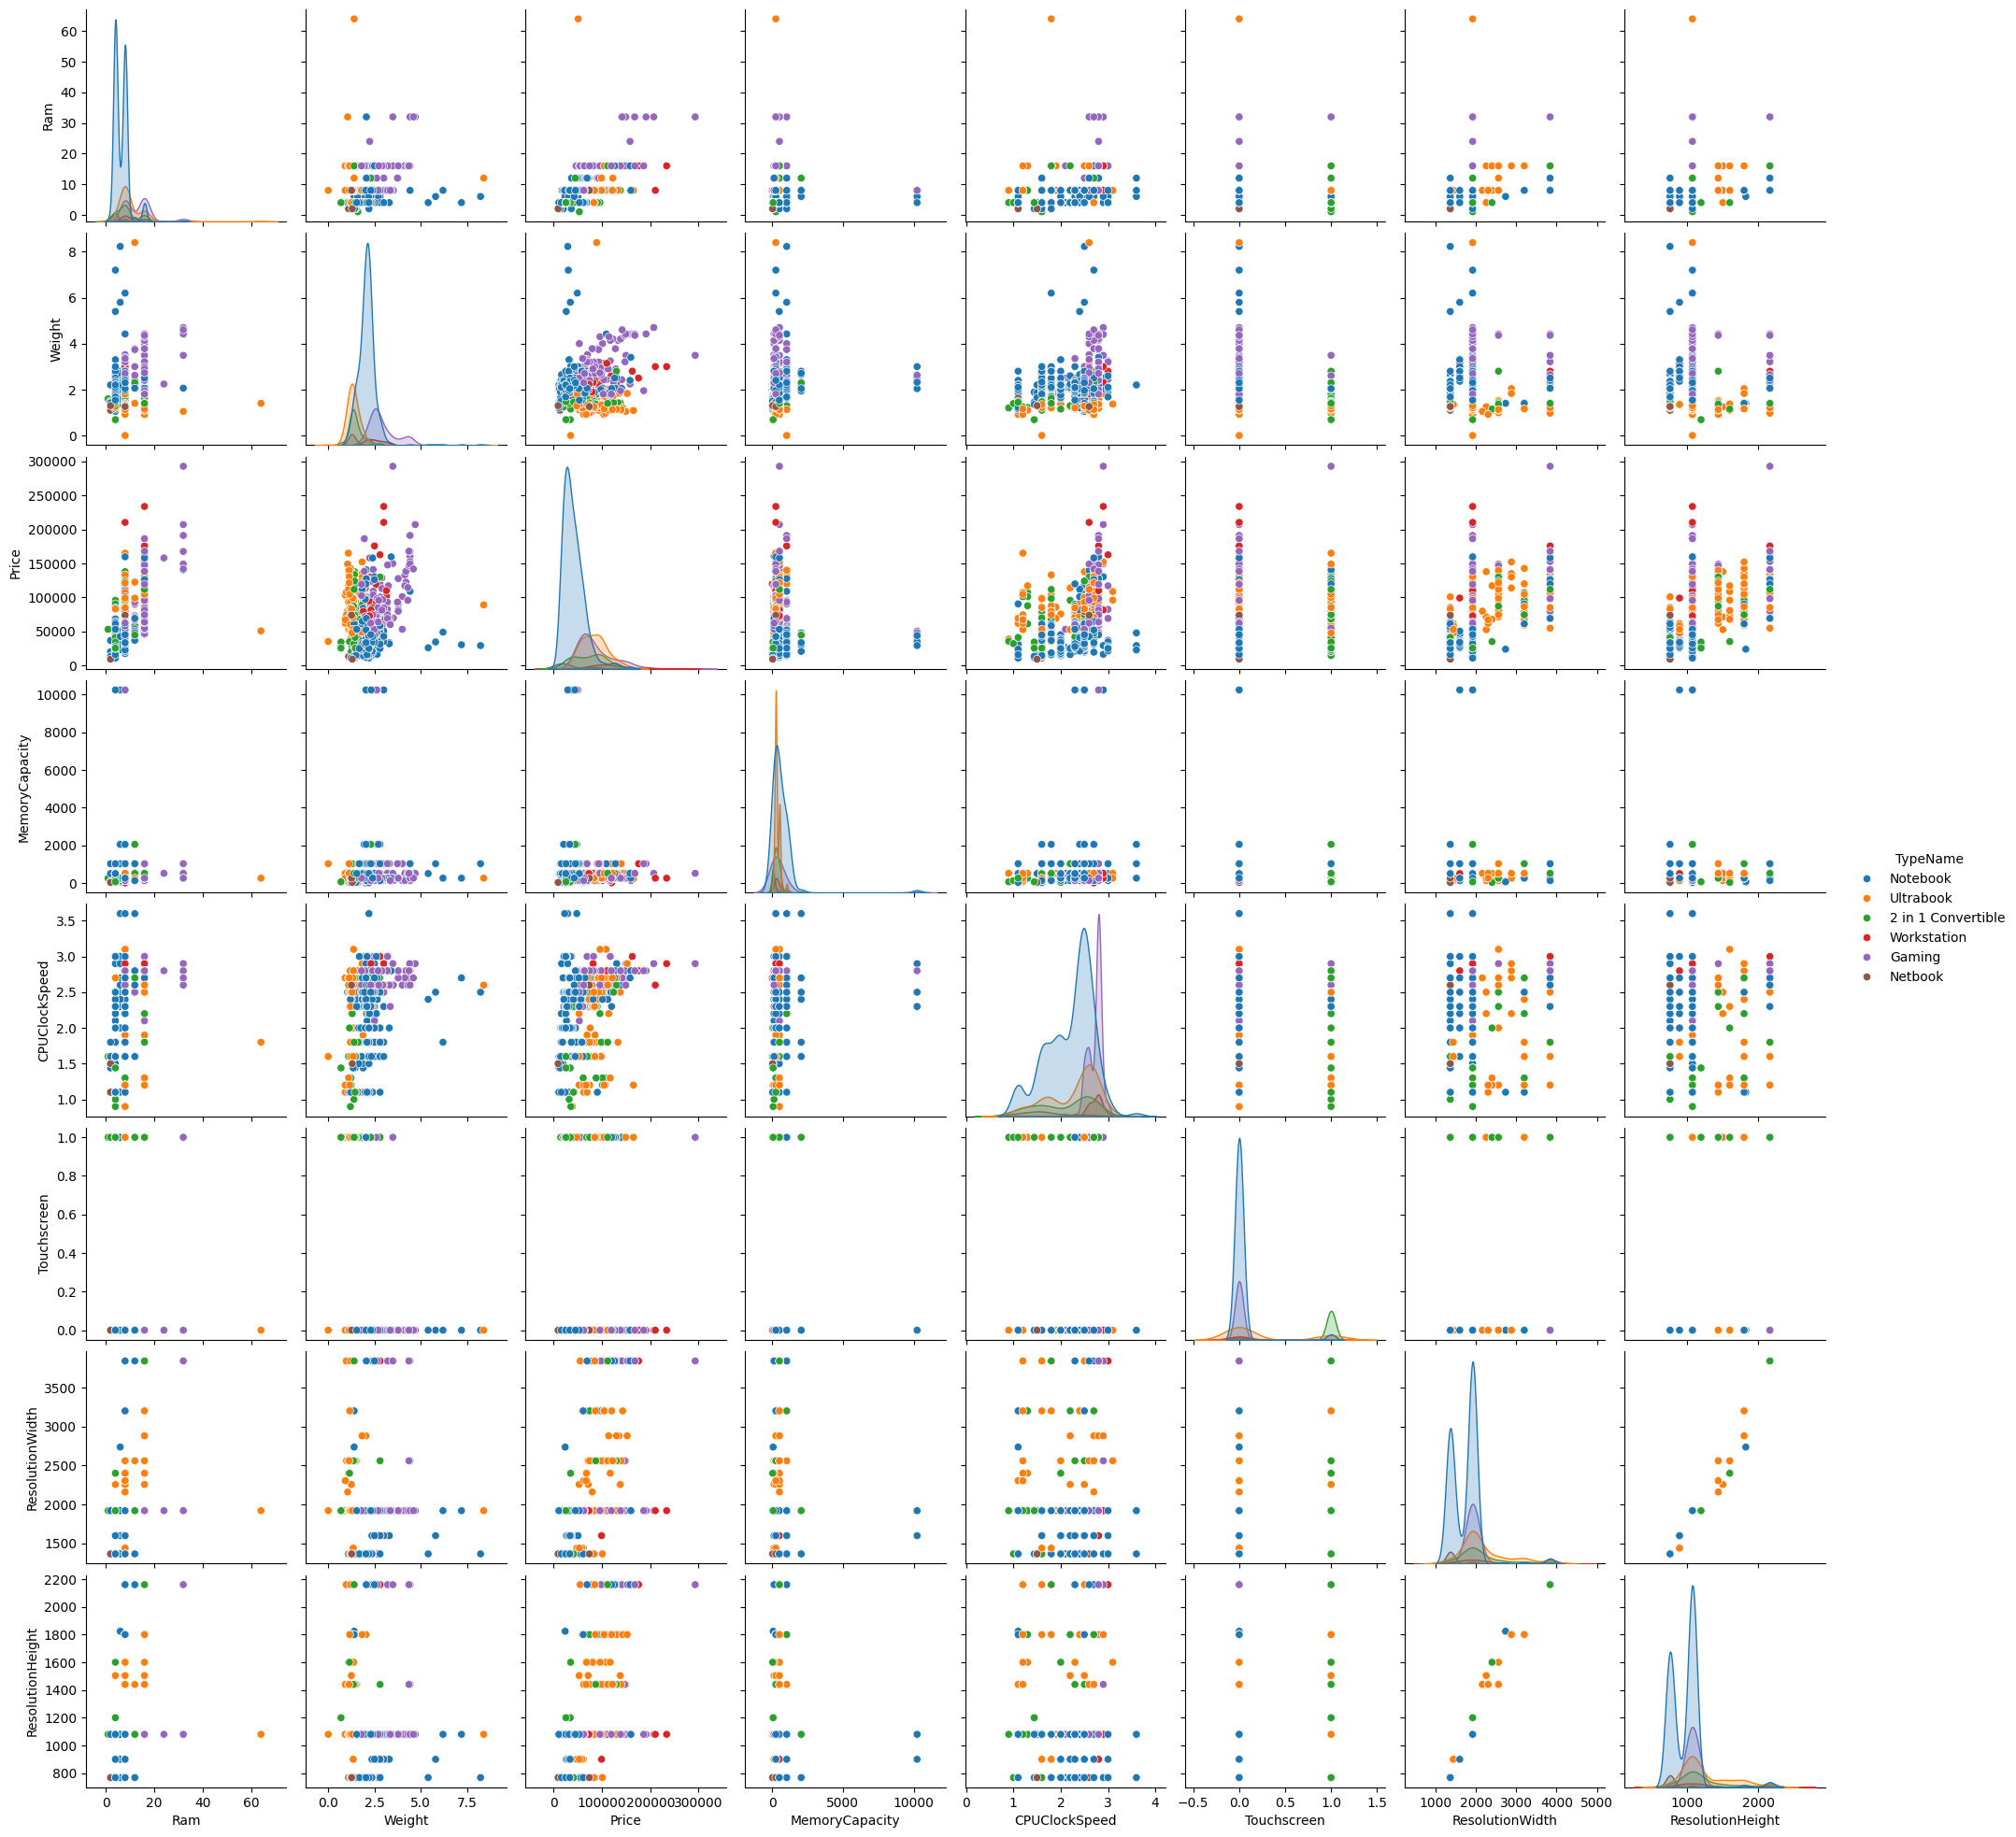

In [1191]:
sb.pairplot(df_train, hue="TypeName")
plt.show()

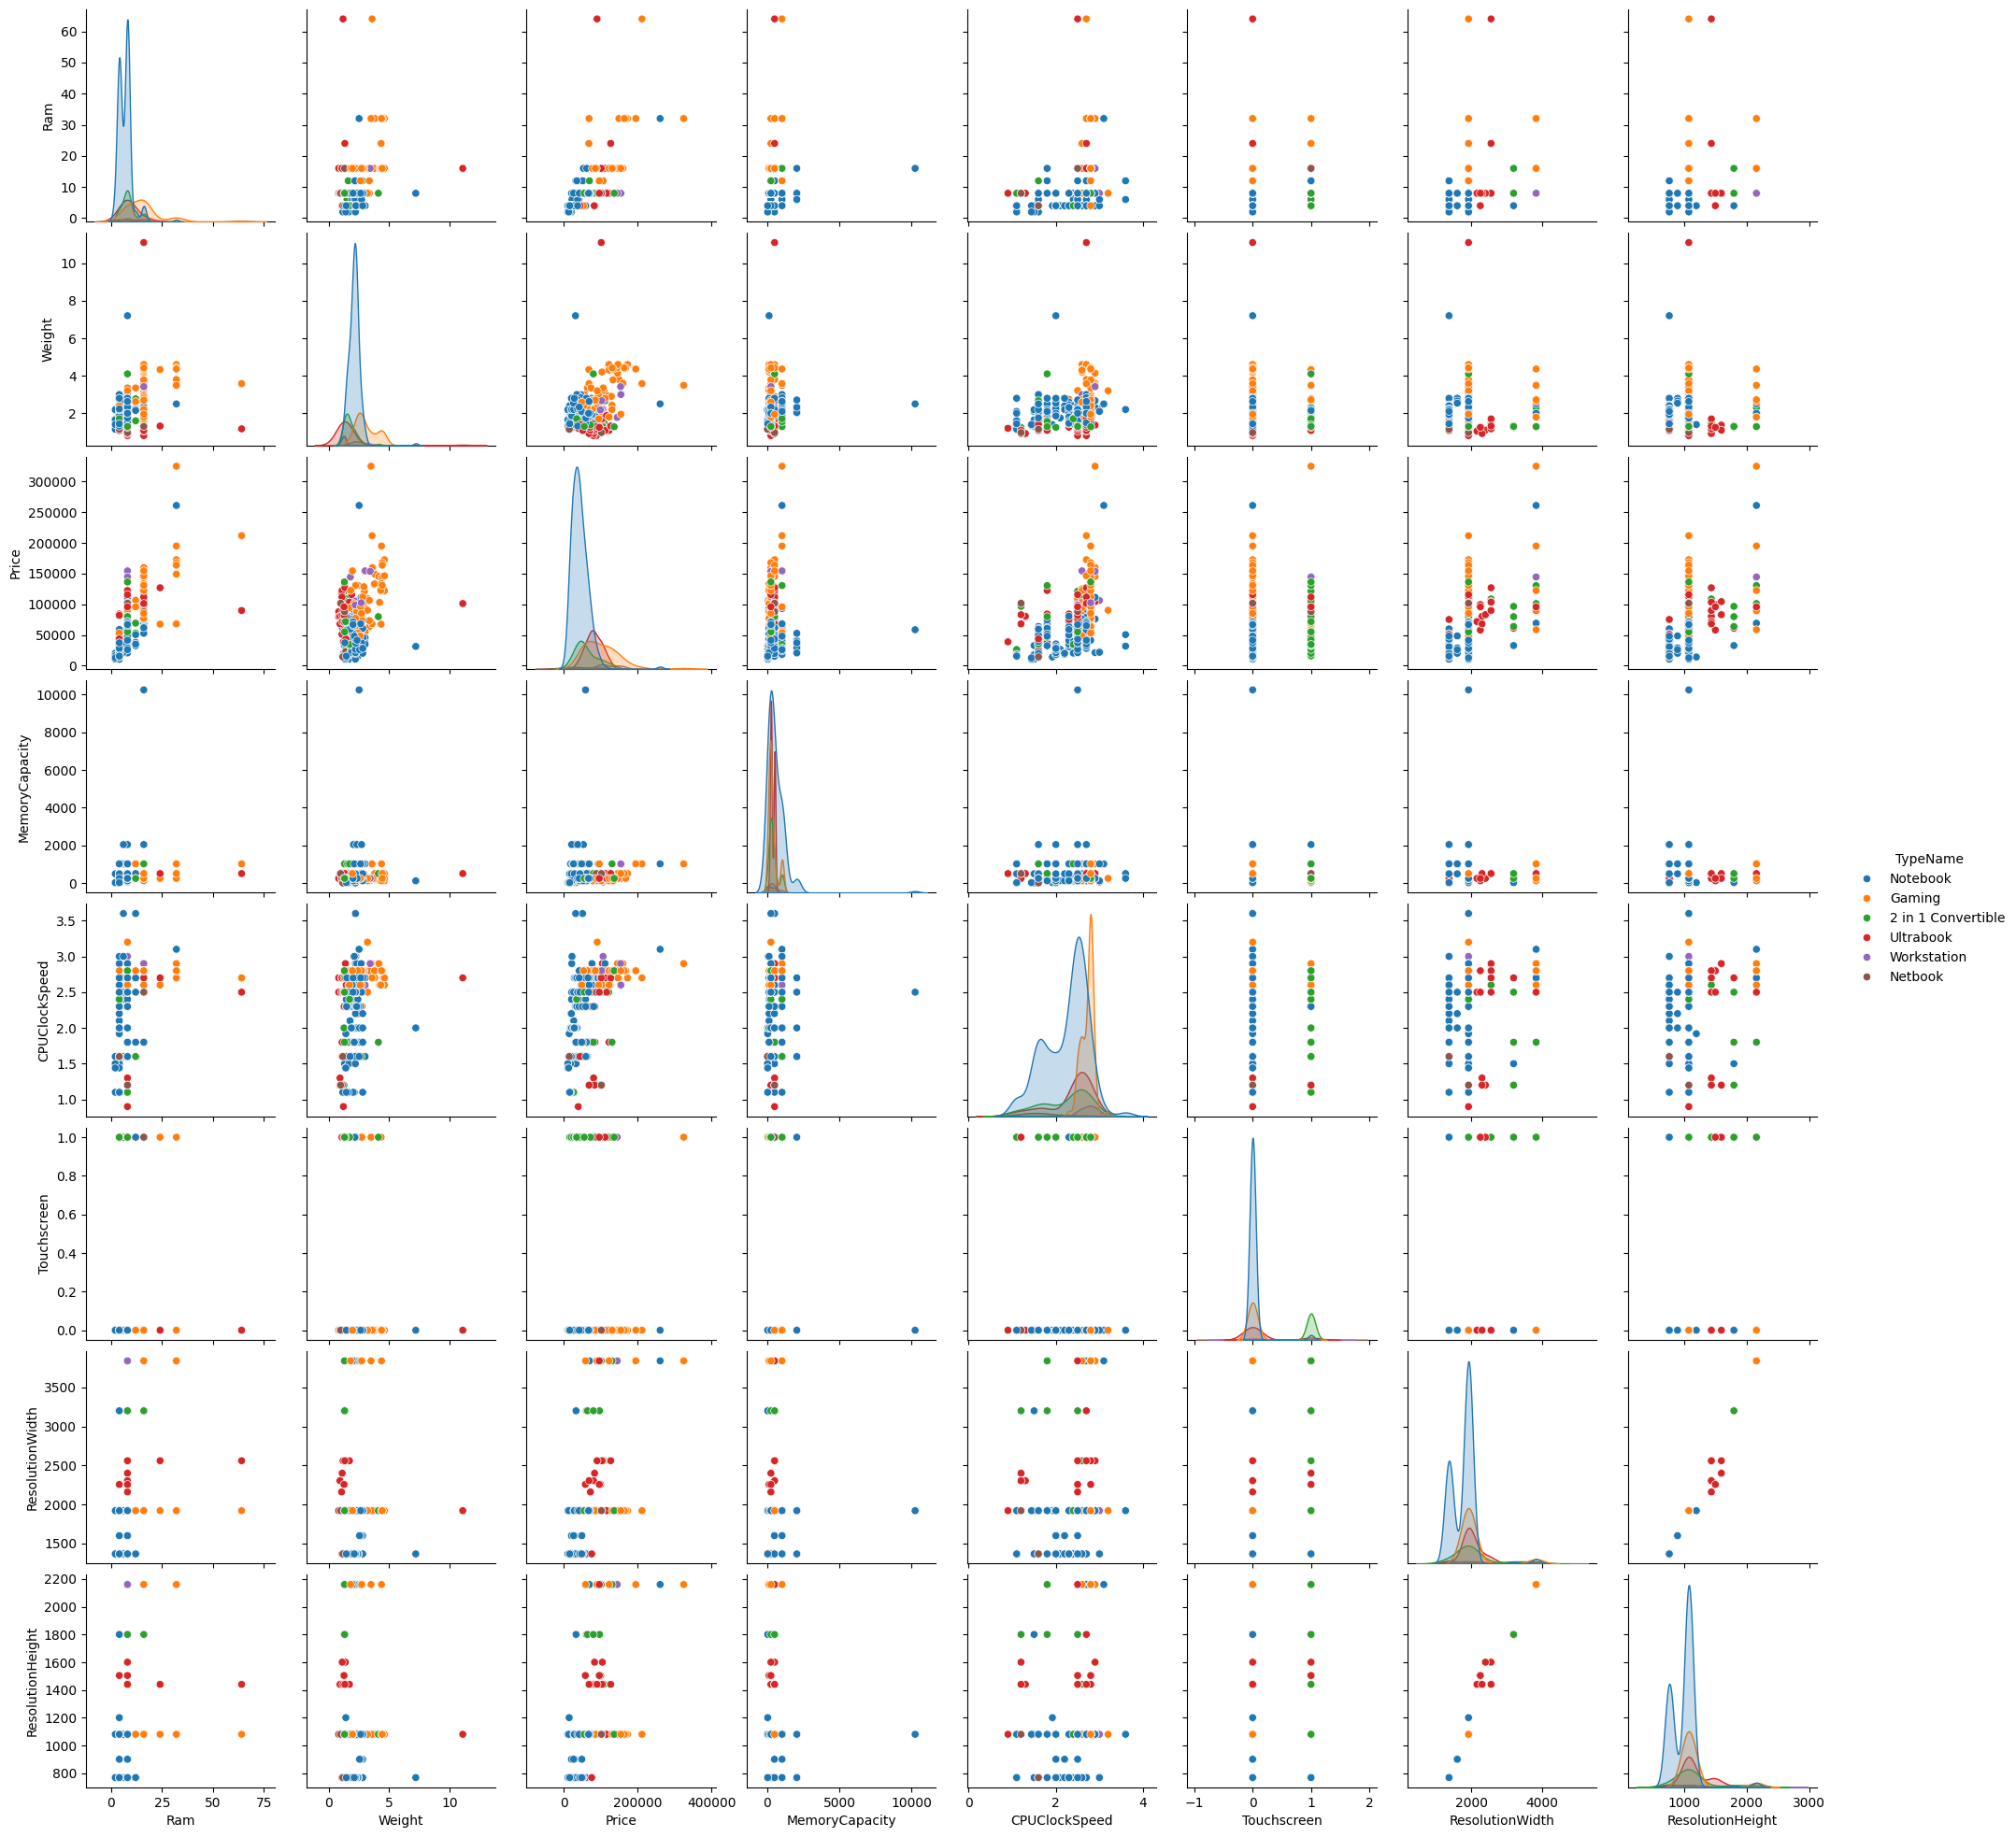

In [1192]:
sb.pairplot(df_test, hue="TypeName")
plt.show()

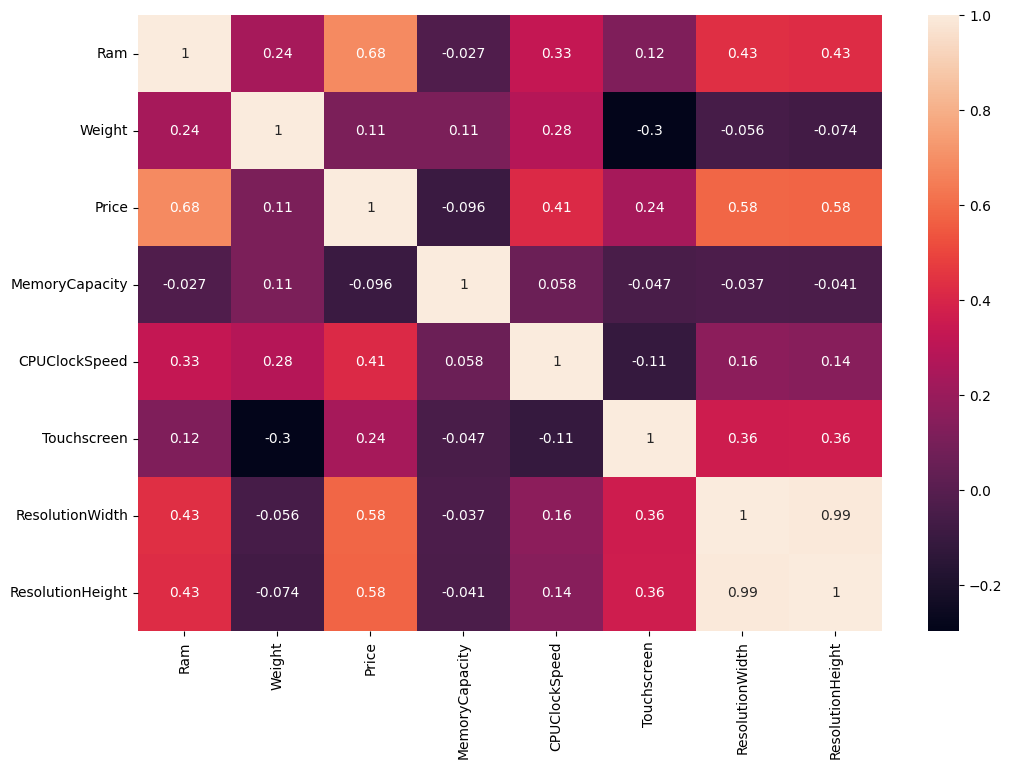

In [1193]:
corr = df_train.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
dataplot = sb.heatmap(corr, annot=True)
plt.show()

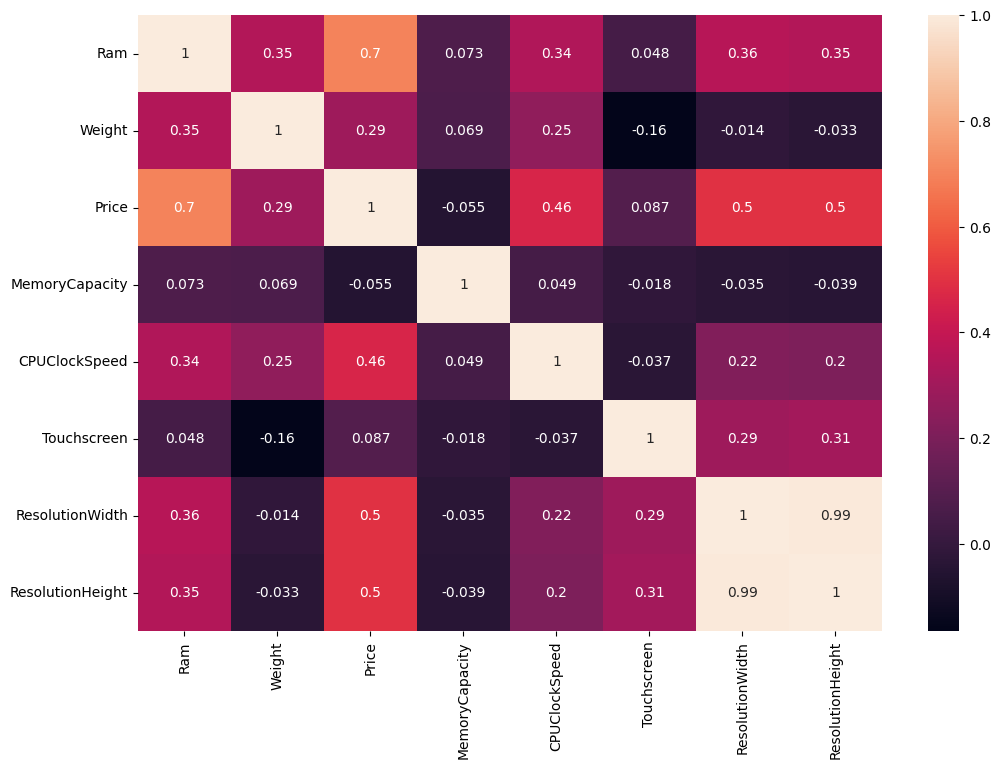

In [1194]:
corr = df_test.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
dataplot = sb.heatmap(corr, annot=True)
plt.show()

In [1195]:
# from sklearn.preprocessing import MinMaxScaler
# # Scaling for columns except the target (Price) column
# numeric_columns = df_train.select_dtypes(np.number).columns
# for col in numeric_columns:
#     df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# scaler = MinMaxScaler()
# df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [1196]:
# # Scaling (transform only) for test df except the target (Price) column
# numeric_columns = df_test.select_dtypes(np.number).columns
# for col in numeric_columns:
#     df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

# df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [1197]:
categorical_train = df_train.select_dtypes(exclude = np.number).columns
categorical_train

Index(['Company', 'TypeName', 'Inches', 'Gpu', 'OpSys', 'MemoryType',
       'CPUModel', 'GPUCompany', 'ScreenName'],
      dtype='object')

In [1198]:
classes = dict()
le = LabelEncoder()
for col in categorical_train:
    df_train[col]= le.fit_transform(df_train[col])
    classes[col] = le.classes_

In [1199]:
categorical_test = df_test.select_dtypes(exclude = np.number).columns
categorical_test

Index(['Company', 'TypeName', 'Inches', 'Gpu', 'OpSys', 'MemoryType',
       'CPUModel', 'GPUCompany', 'ScreenName'],
      dtype='object')

In [1200]:
classes = dict()
le = LabelEncoder()
for col in categorical_test:
    df_test[col]= le.fit_transform(df_test[col])
    classes[col] = le.classes_

In [1201]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [1202]:
x_train, y_train = df_train.drop(columns = 'Price').values, df_train['Price'].values
x_test, y_test = df_test.drop(columns = 'Price').values, df_test['Price'].values

In [1203]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [1204]:
y_pred = reg.predict(x_test)

In [1205]:
y_pred[:10]

array([ 65078.47674357,  61039.63411154,  33074.77951666,  63208.47294493,
        50671.1045683 ,  31217.88570686,  67787.71671814,  16288.7877325 ,
       126642.38572427,  38040.15543603])

In [1206]:
y_test[:10]

array([ 89084.16,  61218.72,  26586.72,  47898.72,  38308.32,  24455.52,
        63456.48,  18594.72, 101178.72,  38681.28])

In [1207]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.6780786909120341, 499109021.42270523, 15249.563774252929)

In [1208]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

In [1209]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.6780834049493645, 499101712.746664, 15242.42482741878)